In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# data files location
fileloc='D:/Lakshmi Mohandas/Bits/ss/Sem2/DM/Assignment/data/'

#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
def normalizedata(X_train):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    return X_train

In [4]:
from scipy import stats

#### 1. Apply Rank-Sum test and find important features for every project

In [5]:
for j in range(1,57):
    fname=fileloc+str(j)+'.csv'
    data=np.genfromtxt(fname, delimiter=',')
    p=np.zeros((np.shape(data)[1]))
    bugs=data[:,-1]
    ino=np.where(bugs==0)
    in1=np.where(bugs==1)
    for i in range(0,np.shape(data)[1]-1):
        f=data[:,i]
        f0=f[ino[0]]
        f1=f[in1[0]]
        a=stats.ranksums(f0,f1)
        p[i]=a.pvalue

    in1=np.where(p<=0.05)
    datan=data[:,in1[0]]
    fname=fileloc+str(56+j)+'.csv'
    np.savetxt(fname, datan, delimiter=',', fmt='%f')
    
    np.set_printoptions(linewidth=np.inf)
    print(in1)
  

(array([ 0,  3,  4,  5,  6,  7,  8, 10, 14, 17, 18, 19, 20], dtype=int64),)
(array([ 3,  7, 20], dtype=int64),)
(array([ 0,  1,  3,  4,  5,  7,  8, 10, 12, 14, 15, 17, 18, 20], dtype=int64),)
(array([ 0,  3,  4,  5,  7,  8, 10, 11, 12, 13, 14, 17, 18, 19, 20], dtype=int64),)
(array([ 0,  3,  4,  5,  6,  7,  8, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20], dtype=int64),)
(array([ 0,  3,  4,  5,  7,  8, 10, 12, 14, 17, 20], dtype=int64),)
(array([ 0,  3,  4,  5,  6,  7, 10, 12, 14, 17, 18, 19, 20], dtype=int64),)
(array([ 0,  3,  4,  5,  8, 14, 19, 20], dtype=int64),)
(array([ 0,  3,  4,  5,  6,  8, 10, 18, 19, 20], dtype=int64),)
(array([ 0,  1,  3,  4,  5,  6,  7,  8, 10, 12, 14, 15, 16, 17, 18, 19, 20], dtype=int64),)
(array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 17, 18, 19, 20], dtype=int64),)
(array([ 0,  4,  5,  7,  8, 10, 17, 19, 20], dtype=int64),)
(array([ 0,  3,  4,  6,  7, 10, 20], dtype=int64),)
(array([ 0,  3,  4,  5,  7,  8, 10, 14, 17, 20], dtype=int64),)
(array([

#### 2. Apply Decision tree, Naïve Bayes, K-NN, and Bagging Classifier on above data and original data

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [7]:
def model1(trdata, tract, tsdata):
    model=DecisionTreeClassifier(criterion='gini')
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred
     
def model2(trdata, tract, tsdata):
    model=DecisionTreeClassifier(criterion='entropy')
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred

def model3(trdata, tract, tsdata):
    model=BernoulliNB()
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred

def model4(trdata, tract, tsdata):
    model=GaussianNB( )
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred
     
def model5(trdata, tract, tsdata):
    model=KNeighborsClassifier()
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred
     
def model6(trdata, tract, tsdata):
    model=BaggingClassifier(KNeighborsClassifier(),n_estimators=10).fit(trdata, tract)
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred
     
def model7(trdata, tract, tsdata):
    model=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10).fit(trdata, tract)
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred

def model8(trdata, tract, tsdata):
    model=AdaBoostClassifier(n_estimators=10).fit(trdata, tract)
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred

def model9(trdata, tract, tsdata):
    model=MultinomialNB()
    model.fit(trdata, tract)
    ypred=model.predict(tsdata)
    return ypred

#### 3. Validate your model using 10-fold cross validation and compute the value of accuracy and F-Measure

In [8]:
from sklearn.metrics import (
    f1_score, precision_score, recall_score, accuracy_score
    )

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore') 

# KFOLD

kf = KFold (10)
acv=np.zeros((112,9))
fm=np.zeros((112,9))

for j in range(1,56*2+1):
    fname=fileloc+str(j)+'.csv'
    data=np.genfromtxt(fname, delimiter=',')
    data[:,0:-1]=normalizedata(data[:,0:-1])
    ypred=np.zeros((np. shape(data)[0],9))
    for tr_in, ts_in in kf.split(data):
        trdata=data[tr_in, 0:-1]
        tract=data[tr_in, -1]
        tsdata=data[ts_in, 0:-1]
        tsact=data[ts_in, -1]
        ypred[ts_in,0]=model1(trdata, tract, tsdata)
        ypred[ts_in,1]=model2(trdata, tract, tsdata)
        ypred[ts_in,2]=model3(trdata, tract, tsdata)
        ypred[ts_in,3]=model4(trdata, tract, tsdata)
        ypred[ts_in,4]=model5(trdata, tract, tsdata)
        ypred[ts_in,5]=model6(trdata, tract, tsdata)
        ypred[ts_in,6]=model7(trdata, tract, tsdata)
        ypred[ts_in,7]=model8(trdata, tract, tsdata)
        ypred[ts_in,8]=model9(trdata, tract, tsdata)
        
# Accuracy and F1 measure
    for i in range(0,9):
        acv[j-1, i]=accuracy_score(data[:,-1], ypred[:,i])
        fm[j-1, i]=f1_score(data[:,-1],ypred[:,i])

In [10]:
print(acv)

[[0.76       0.736      0.832      ... 0.832      0.816      0.832     ]
 [0.69662921 0.68539326 0.71348315 ... 0.76966292 0.71910112 0.7752809 ]
 [0.82935154 0.86006826 0.81911263 ... 0.90784983 0.88395904 0.88737201]
 ...
 [0.89795918 0.90986395 0.90816327 ... 0.92006803 0.92857143 0.78911565]
 [0.69135802 0.68518519 0.69135802 ... 0.70987654 0.7654321  0.61111111]
 [0.82758621 0.79310345 0.79310345 ... 0.79310345 0.86206897 0.86206897]]


In [11]:
acv1 = pd.DataFrame(acv)

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    with pd.option_context('expand_frame_repr', False):
        print(acv1)

            0         1         2         3         4         5         6         7         8
0    0.760000  0.736000  0.832000  0.776000  0.856000  0.840000  0.832000  0.816000  0.832000
1    0.696629  0.685393  0.713483  0.455056  0.685393  0.696629  0.769663  0.719101  0.775281
2    0.829352  0.860068  0.819113  0.750853  0.863481  0.870307  0.907850  0.883959  0.887372
3    0.746439  0.754986  0.726496  0.783476  0.777778  0.760684  0.769231  0.792023  0.760684
4    0.773154  0.762416  0.766443  0.808054  0.802685  0.802685  0.795973  0.834899  0.808054
5    0.756410  0.807692  0.824786  0.427350  0.833333  0.854701  0.850427  0.863248  0.867521
6    0.790698  0.813953  0.651163  0.837209  0.883721  0.860465  0.906977  0.883721  0.790698
7    0.914454  0.917404  0.946903  0.917404  0.955752  0.955752  0.952802  0.952802  0.955752
8    0.628289  0.634868  0.572368  0.651316  0.629934  0.652961  0.682566  0.631579  0.654605
9    0.770642  0.790138  0.777523  0.791284  0.826835  0.823

#### 4. Represent your results using Box-plot diagram and Hypothesis Testing

In [12]:
p=np.zeros((9,9))
for i in range(0,9):
    for j in range(0,9):
        a=stats.ranksums(acv[:,i], acv[:,j])
        p[i,j]=a.pvalue

In [13]:
p1=p<=0.05
print(p1)

[[False False False False  True  True  True  True False]
 [False False False False  True  True  True  True False]
 [False False False False  True  True  True  True  True]
 [False False False False  True  True  True  True  True]
 [ True  True  True  True False False False False False]
 [ True  True  True  True False False False False False]
 [ True  True  True  True False False False False False]
 [ True  True  True  True False False False False False]
 [False False  True  True False False False False False]]


In [14]:
acvf=np.zeros((56*9,2))
for i in range(0,2):
    for j in range(0,56):
        acvf[9*j:9*(j+1),i]=acv[56*i+j,:]

a=stats.ranksums(acvf[:,0],acvf[:,1])
print(a.pvalue)

0.11162659555120864


Text(0.5,1,'Comparing Accuracy Values of multiple Classifiers')

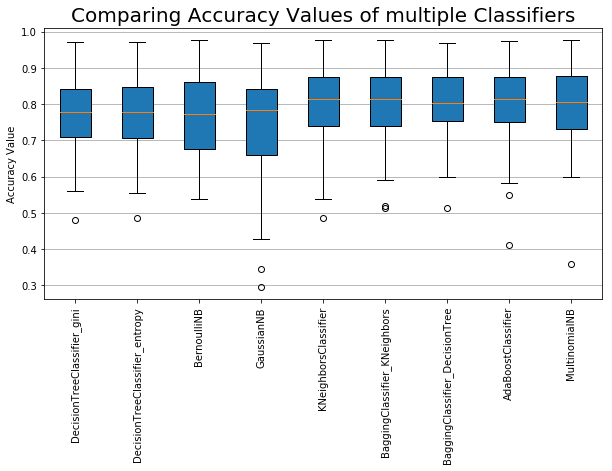

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ax.grid(color='black', axis='y', linestyle='-', linewidth=0.55, alpha=1)
plt.boxplot(acv,vert=True, patch_artist=True)
plt.xticks([1,2,3,4,5,6,7,8,9], ['DecisionTreeClassifier_gini', 'DecisionTreeClassifier_entropy','BernoulliNB','GaussianNB',
                                 'KNeighborsClassifier', 'BaggingClassifier_KNeighbors','BaggingClassifier_DecisionTree', 
                                 'AdaBoostClassifier', 'MultinomialNB'],rotation='vertical')
plt.ylabel('Accuracy Value', fontsize=10)
plt.title('Comparing Accuracy Values of multiple Classifiers',fontsize=20)

### Observation 1:
##### Comparing all models,'K Neighbour Classifier', 'Bagging Classifier - KNeighbor', 'AdaBoost Classifier' Models are giving the highest accuracy values for the predictions.

Text(0.5,1,'Comparing All features and Significant features')

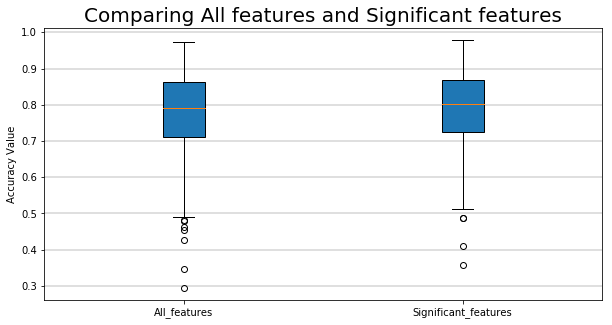

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.grid(color='black', axis='y', linestyle='-', linewidth=0.25, alpha=1)
plt.boxplot(acvf,vert=True, patch_artist=True)
plt.xticks([1,2], ['All_features', 'Significant_features'])
plt.ylabel('Accuracy Value', fontsize=10)
plt.title('Comparing All features and Significant features',fontsize=20)

### Observation 2: 
##### The Accuracy for the Models trained on Significant Features is better than the Models trained on All Features